In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML

In [3]:
def read_data(file_name='touchpoints.txt'):
    touchs = []
    with open(file_name, 'r') as f:
        for line in f.readlines():
            touchs.append(json.loads(line))
    return touchs

In [4]:
def plot_sides(df, name):
    
    print("mean side1:", np.mean(df['side1']))
    print("mean side2:", np.mean(df['side2']))
    print("mean side3:", np.mean(df['side3']))
    
    print("max-min 1:", np.max(df['side1'])-np.min(df['side1']))
    print("max-min 2:", np.max(df['side2'])-np.min(df['side2']))
    print("dmax-min 3:", np.max(df['side3'])-np.min(df['side3']))
    
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df['side1'], 'red', label='side1')
    ax.plot(df['side2'], 'green', label='side2')
    ax.plot(df['side3'], 'blue', label='side3')
    ax.set_xlabel('N')
    ax.set_ylabel('length')
    ax.grid()
    ax.legend(loc=2)
    plt.savefig(name.split('.')[0]+'.png')
    plt.show()

In [5]:
def filter_3touch(df):
    df_3touchs = df[df['Count']==3]['touches']
    sorted_by_id = [[t_dict['Position'] for t_dict in sorted(df_string, key=lambda k: k.get("id"))] for df_string in df_3touchs.tolist()]
    return pd.DataFrame(sorted_by_id, columns=['1_touch', '2_touch', '3_touch'])

In [6]:
def concat_coordinates(df):
    first_touch = pd.DataFrame([t_dict for t_dict in df['1_touch']])
    second_touch = pd.DataFrame([t_dict for t_dict in df['2_touch']])
    third_touch = pd.DataFrame([t_dict for t_dict in df['3_touch']])
    full_df = pd.concat([first_touch, second_touch, third_touch], axis=1)
    full_df.columns=['X1','Y1','X2','Y2','X3','Y3']
    return full_df

In [7]:
def add_sides(df):
    df['side1']=np.sqrt((df['X2']-df['X1'])**2 + (df['Y2']-df['Y1'])**2)
    df['side2']=np.sqrt((df['X3']-df['X2'])**2 + (df['Y3']-df['Y2'])**2)
    df['side3']=np.sqrt((df['X1']-df['X3'])**2 + (df['Y1']-df['Y3'])**2)
    return df

In [8]:
def preprocess_data(file_name='touchpoints.txt'):
    touchs = read_data(file_name)
    df_raw = pd.DataFrame(touchs)
    
    df = filter_3touch(df_raw)
    df = concat_coordinates(df) 
    df = add_sides(df)
    
    return df

In [9]:
def show_results(df=None, file_name='touchpoints.txt'):
    if not df:
        df = preprocess_data(file_name)
    df['side1_d'] = abs(df['side1']-np.mean(df['side1']))
    df['side2_d'] = abs(df['side2']-np.mean(df['side2']))
    df['side3_d'] = abs(df['side3']-np.mean(df['side3']))
    
    print('среднее отклонение сторона 1:', np.mean(df['side1_d']))
    print('среднее отклонение сторона 2:', np.mean(df['side2_d']))
    print('среднее отклонение сторона 3:', np.mean(df['side3_d']))
    
    plot_sides(df, file_name)
    draw_separate_moving(df, file_name)
    return draw_moving(df, file_name)

In [10]:
# для анимации убрать комментарии и запускать строки с html
# plt.scatter(df.iloc[i][:6:2], df.iloc[i][1:6:2])
def draw_moving(df, name):
    fig = plt.figure(figsize=(10, 6))
    #camera = Camera(fig)
    for i in range(len(df)):
        plt.scatter(df['X1'][i], df['Y1'][i], c='r')
        plt.scatter(df['X2'][i], df['Y2'][i], c='g')
        plt.scatter(df['X3'][i], df['Y3'][i], c='b')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
    plt.savefig(name.split('.')[0]+'_moving.png')
        #camera.snap()
    #animation = camera.animate()
    #return animation

In [11]:
def draw_separate_moving(df, name):
    plt.figure(figsize=(20, 6))
    for i in range(len(df)):
        plt.subplot(1, 3, 1)
        plt.scatter(df['X1'][i], df['Y1'][i], c='r')
        plt.subplot(1, 3, 2)
        plt.scatter(df['X2'][i], df['Y2'][i], c='g')
        plt.subplot(1, 3, 3)
        plt.scatter(df['X3'][i], df['Y3'][i], c='b')
        plt.xlim(0, 1)
        plt.ylim(0, 1) 
    plt.savefig(name.split('.')[0]+'_separate_moving.png')

среднее отклонение сторона 1: 0.006167176994604271
среднее отклонение сторона 2: 0.002690556949823836
среднее отклонение сторона 3: 0.0022337868031798817
mean side1: 0.09071664623186736
mean side2: 0.0802166979407902
mean side3: 0.04819976280389045
max-min 1: 0.0348051810570701
max-min 2: 0.023180411405030604
dmax-min 3: 0.017576484969775867


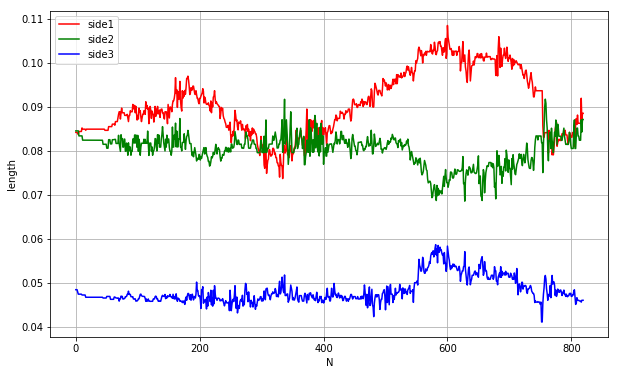

C:\Users\alez_\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


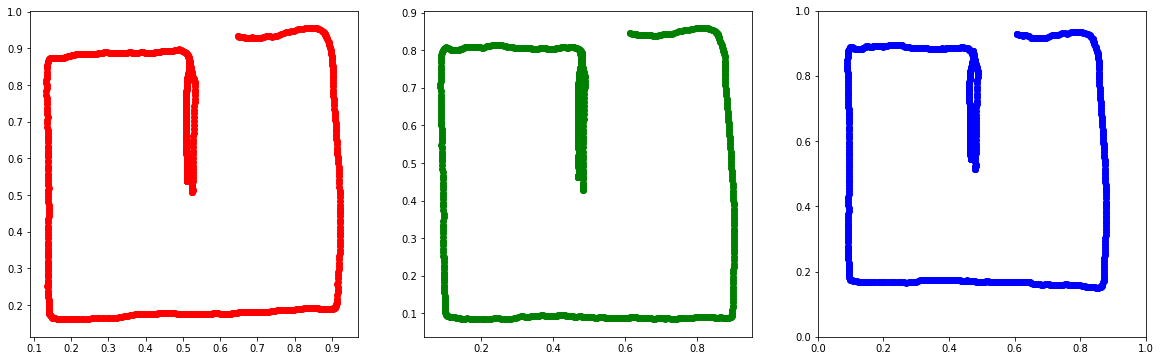

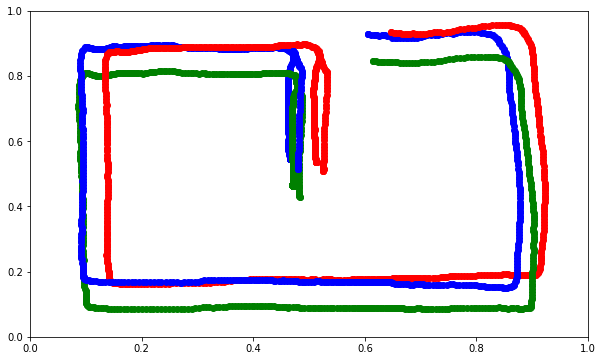

In [12]:
marker1_location_moving = show_results(file_name='1marker/touchpoints.txt')

среднее отклонение сторона 1: 0.013397268741812554
среднее отклонение сторона 2: 0.011527107414862056
среднее отклонение сторона 3: 0.011565064755126217
mean side1: 0.08356416336115989
mean side2: 0.06299305840976897
mean side3: 0.0679625269915929
max-min 1: 0.04820316898767406
max-min 2: 0.03921734339453022
dmax-min 3: 0.0394695948864437


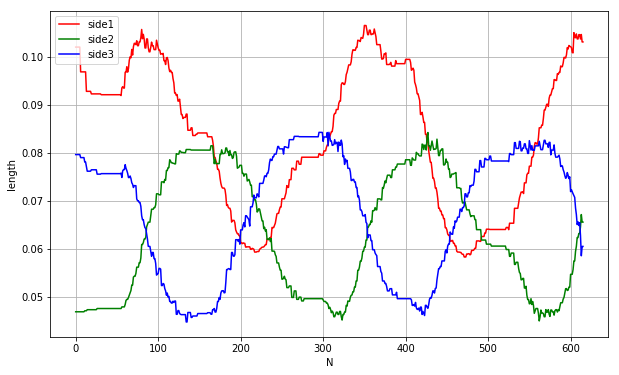

C:\Users\alez_\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


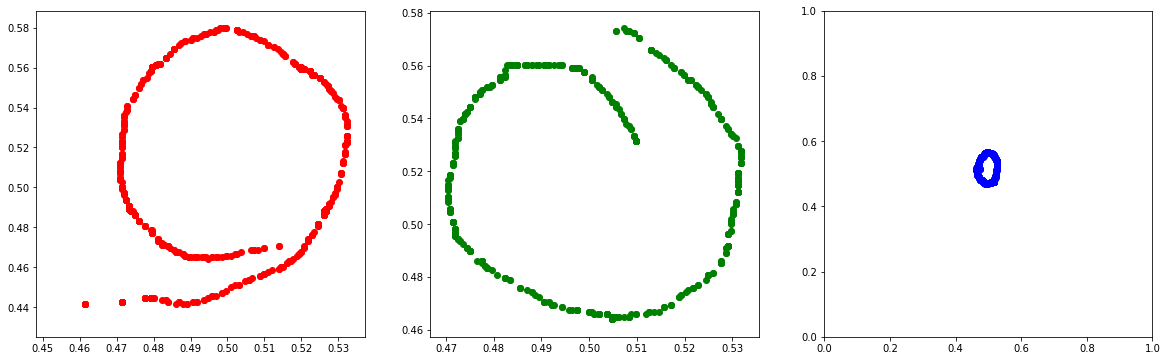

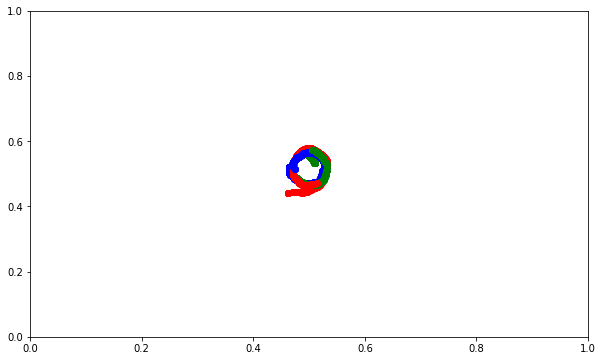

In [13]:
marker1_rotation_moving = show_results(file_name='1marker/touchpoints-2.txt')

среднее отклонение сторона 1: 0.013480922695662447
среднее отклонение сторона 2: 0.011299006816011639
среднее отклонение сторона 3: 0.00952063842735194
mean side1: 0.07815747765052611
mean side2: 0.06494240354593601
mean side3: 0.06811971340908632
max-min 1: 0.05133905435656801
max-min 2: 0.04772396145777866
dmax-min 3: 0.042587297406815126


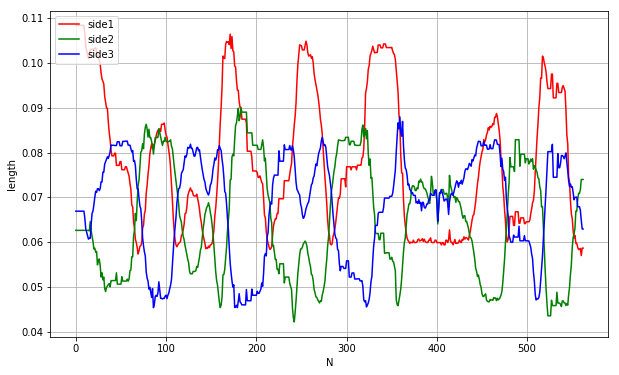

C:\Users\alez_\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


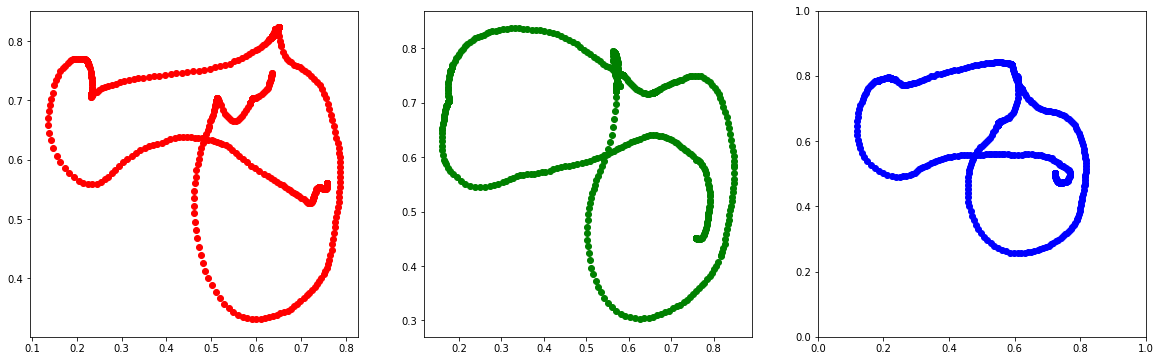

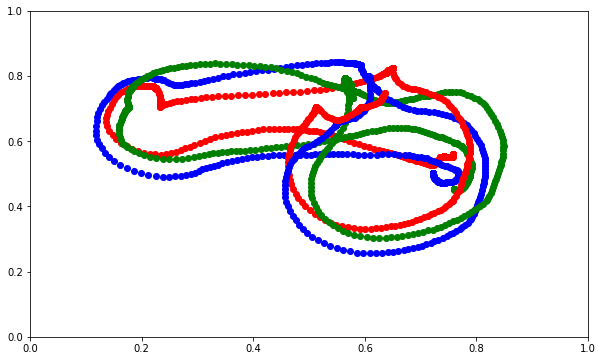

In [14]:
marker1_all_moving = show_results(file_name='1marker/touchpoints-3.txt')

In [41]:
HTML(marker1_location_moving.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [ ]:
HTML(marker1_rotation_moving.to_html5_video())

In [ ]:
HTML(marker1_all_moving.to_html5_video())

# Черновик

In [27]:
df = preprocess_data('touchpoints.txt')

In [29]:
df.iloc[1][1:6:2]

Y1    0.487037
Y2    0.568519
Y3    0.547222
Name: 1, dtype: float64

среднее отклонение сторона 1: 0.013388592011909638
среднее отклонение сторона 2: 0.011459867674784895
среднее отклонение сторона 3: 0.01464990016176282
mean side1: 0.07868984459606414
mean side2: 0.06555775355132988
mean side3: 0.067220985367569
max-min 1: 0.063200982894203
max-min 2: 0.04345146279012925
dmax-min 3: 0.09962070102414201


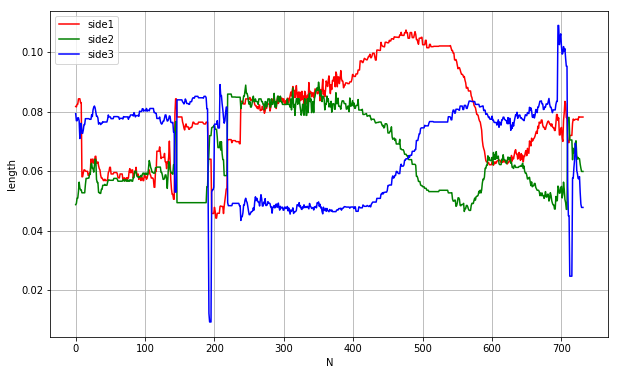

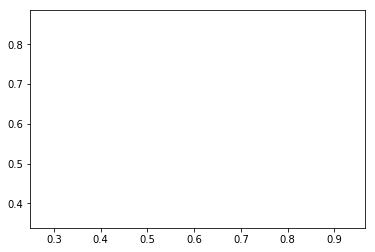

In [34]:
an1 = show_results()

In [44]:
touchs = read_data('touchpoints.txt')

In [45]:
df_raw = pd.DataFrame(touchs)
df_raw.head()

,Count,Id,timestamp,touches
0,1,13016,348582,"[{'id': 0, 'Position': {'X': 0.484895825, 'Y':..."
1,2,13017,348604,"[{'id': 0, 'Position': {'X': 0.484895825, 'Y':..."
2,2,13018,348626,"[{'id': 0, 'Position': {'X': 0.484895825, 'Y':..."
3,2,13019,348648,"[{'id': 0, 'Position': {'X': 0.494791657, 'Y':..."
4,2,13020,348670,"[{'id': 0, 'Position': {'X': 0.494791657, 'Y':..."


## Возьмем только те где 3 тача

In [46]:
df_3touchs = df_raw[df_raw['Count']==3]
df_3touchs.head()

,Count,Id,timestamp,touches
108,3,13124,350888,"[{'id': 0, 'Position': {'X': 0.472395837, 'Y':..."
109,3,13125,350930,"[{'id': 0, 'Position': {'X': 0.475, 'Y': 0.487..."
110,3,13126,350972,"[{'id': 0, 'Position': {'X': 0.475, 'Y': 0.487..."
111,3,13127,351014,"[{'id': 0, 'Position': {'X': 0.4734375, 'Y': 0..."
112,3,13128,351059,"[{'id': 0, 'Position': {'X': 0.4734375, 'Y': 0..."


наверное нужны только данные о тачах

In [47]:
df_3touchs = df_3touchs['touches']
df_3touchs.head()

108    [{'id': 0, 'Position': {'X': 0.472395837, 'Y':...
109    [{'id': 0, 'Position': {'X': 0.475, 'Y': 0.487...
110    [{'id': 0, 'Position': {'X': 0.475, 'Y': 0.487...
111    [{'id': 0, 'Position': {'X': 0.4734375, 'Y': 0...
112    [{'id': 0, 'Position': {'X': 0.4734375, 'Y': 0...
Name: touches, dtype: object

## Таблица касаний

In [48]:
sorted_by_id = [[t_dict['Position'] for t_dict in sorted(df_string, key=lambda k: k.get("id"))] for df_string in df_3touchs.tolist()]

In [49]:
df = pd.DataFrame(sorted_by_id, columns=['1_touch', '2_touch', '3_touch'])
df.head()

,1_touch,2_touch,3_touch
0,"{'X': 0.472395837, 'Y': 0.4861111}","{'X': 0.478645831, 'Y': 0.5675926}","{'X': 0.5229167, 'Y': 0.5472222}"
1,"{'X': 0.475, 'Y': 0.487037033}","{'X': 0.478645831, 'Y': 0.5685185}","{'X': 0.5229167, 'Y': 0.5472222}"
2,"{'X': 0.475, 'Y': 0.487037033}","{'X': 0.477083325, 'Y': 0.5694444}","{'X': 0.5229167, 'Y': 0.5472222}"
3,"{'X': 0.4734375, 'Y': 0.487037033}","{'X': 0.477083325, 'Y': 0.5694444}","{'X': 0.5229167, 'Y': 0.5472222}"
4,"{'X': 0.4734375, 'Y': 0.487037033}","{'X': 0.475520819, 'Y': 0.5712963}","{'X': 0.5229167, 'Y': 0.5472222}"


In [50]:
first_touch = pd.DataFrame([t_dict for t_dict in df['1_touch']])
second_touch = pd.DataFrame([t_dict for t_dict in df['2_touch']])
third_touch = pd.DataFrame([t_dict for t_dict in df['3_touch']])

In [51]:
full_df = pd.concat([first_touch, second_touch, third_touch], axis=1)
full_df.columns=['X1','Y1','X2','Y2','X3','Y3']
full_df.head()

,X1,Y1,X2,Y2,X3,Y3
0,0.472396,0.486111,0.478646,0.567593,0.522917,0.547222
1,0.475000,0.487037,0.478646,0.568519,0.522917,0.547222
2,0.475000,0.487037,0.477083,0.569444,0.522917,0.547222
3,0.473438,0.487037,0.477083,0.569444,0.522917,0.547222
4,0.473438,0.487037,0.475521,0.571296,0.522917,0.547222


# Анимация

In [ ]:
fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
animation = camera.animate()

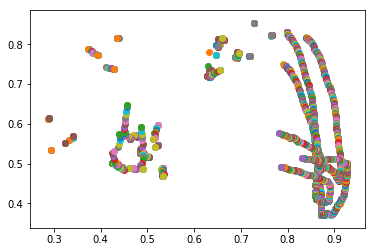

In [60]:

for i in range(len(full_df)):
    plt.scatter(full_df.iloc[i][::2], full_df.iloc[i][1::2])
    

In [14]:
full_df['side1']=np.sqrt((full_df['X2']-full_df['X1'])**2 + (full_df['Y2']-full_df['Y1'])**2)
full_df['side2']=np.sqrt((full_df['X3']-full_df['X2'])**2 + (full_df['Y3']-full_df['Y2'])**2)
full_df['side3']=np.sqrt((full_df['X1']-full_df['X3'])**2 + (full_df['Y1']-full_df['Y3'])**2)
full_df.head()

,X1,Y1,X2,Y2,X3,Y3,side1,side2,side3
0,0.472396,0.486111,0.478646,0.567593,0.522917,0.547222,0.081721,0.048733,0.079290
1,0.475000,0.487037,0.478646,0.568519,0.522917,0.547222,0.081563,0.049127,0.076930
2,0.475000,0.487037,0.477083,0.569444,0.522917,0.547222,0.082434,0.050936,0.076930
3,0.473438,0.487037,0.477083,0.569444,0.522917,0.547222,0.082488,0.050936,0.077913
4,0.473438,0.487037,0.475521,0.571296,0.522917,0.547222,0.084285,0.053159,0.077913


mean side1: 0.07868984459606414
mean side2: 0.06555775355132988
mean side3: 0.067220985367569
max-min 1: 0.063200982894203
max-min 2: 0.04345146279012925
dmax-min 3: 0.09962070102414201


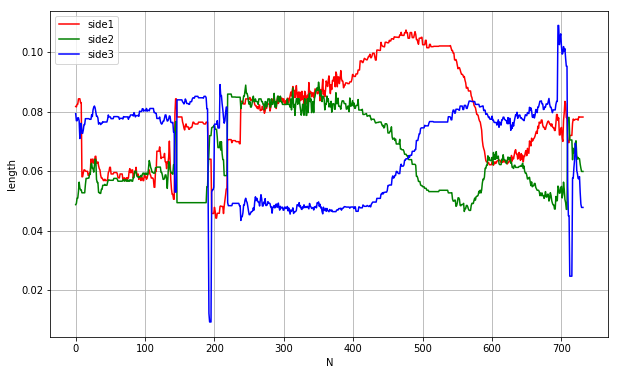

In [15]:
plot_sides(full_df)

среднее отклонение сторона 1: 0.006167176994604271
среднее отклонение сторона 2: 0.002690556949823836
среднее отклонение сторона 3: 0.0022337868031798817
mean side1: 0.09071664623186736
mean side2: 0.0802166979407902
mean side3: 0.04819976280389045
max-min 1: 0.0348051810570701
max-min 2: 0.023180411405030604
dmax-min 3: 0.017576484969775867


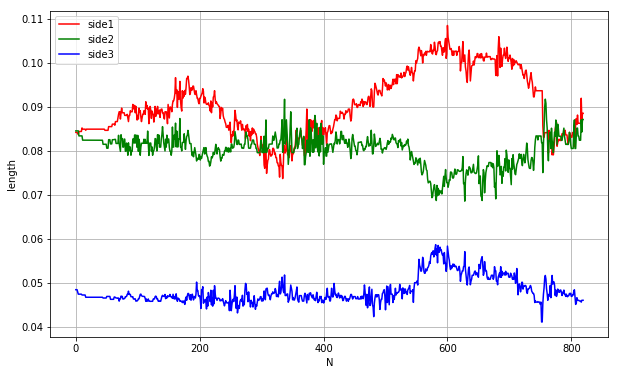

In [63]:
marker1_location = show_results('1marker/touchpoints.txt')

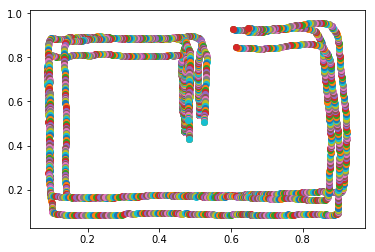

In [67]:
draw_moving(marker1_location)

среднее отклонение сторона 1: 0.013397268741812554
среднее отклонение сторона 2: 0.011527107414862056
среднее отклонение сторона 3: 0.011565064755126217
mean side1: 0.08356416336115989
mean side2: 0.06299305840976897
mean side3: 0.0679625269915929
max-min 1: 0.04820316898767406
max-min 2: 0.03921734339453022
dmax-min 3: 0.0394695948864437


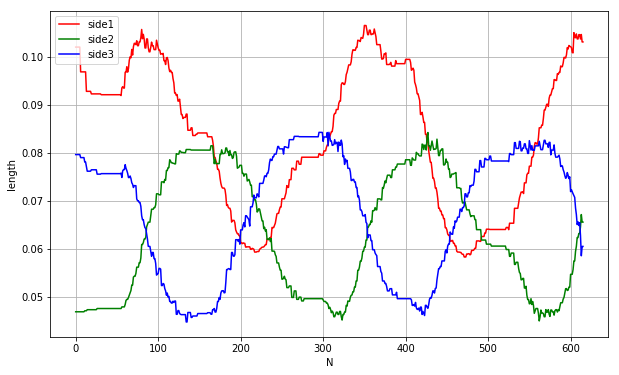

In [29]:
show_results('1marker/touchpoints-2.txt')

среднее отклонение сторона 1: 0.013480922695662447
среднее отклонение сторона 2: 0.011299006816011639
среднее отклонение сторона 3: 0.00952063842735194
mean side1: 0.07815747765052611
mean side2: 0.06494240354593601
mean side3: 0.06811971340908632
max-min 1: 0.05133905435656801
max-min 2: 0.04772396145777866
dmax-min 3: 0.042587297406815126


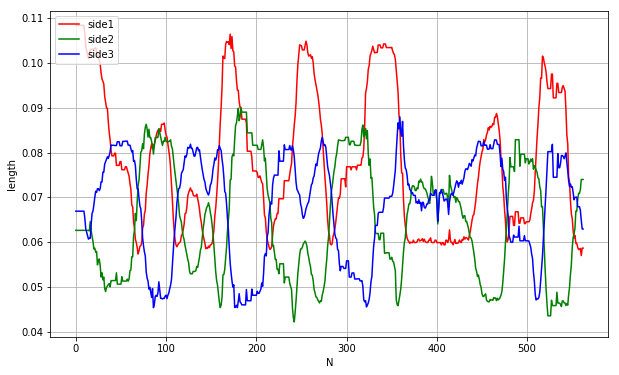

In [30]:
show_results('1marker/touchpoints-3.txt')

среднее отклонение сторона 1: 0.012513258972042196
среднее отклонение сторона 2: 0.004735782478930722
среднее отклонение сторона 3: 0.004194135675374519
mean side1: 0.08781039002390886
mean side2: 0.07351977427861692
mean side3: 0.061813594357866784
max-min 1: 0.047770677749445045
max-min 2: 0.030560694141736712
dmax-min 3: 0.026653123287564924


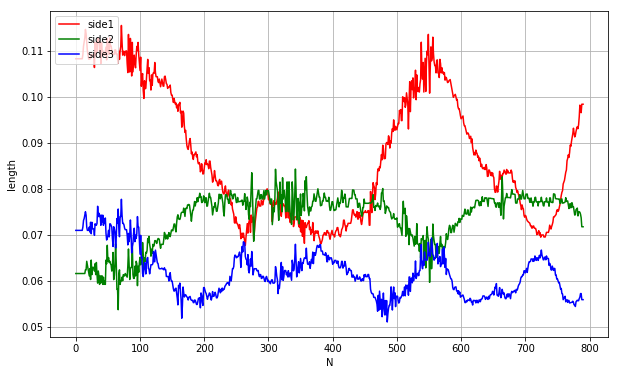

In [31]:
show_results('2marker/touchpoints-4.txt')

среднее отклонение сторона 1: 0.015191461556583241
среднее отклонение сторона 2: 0.010314128411263003
среднее отклонение сторона 3: 0.013412770400579567
mean side1: 0.09113489016395059
mean side2: 0.061878920269343496
mean side3: 0.07787580196969736
max-min 1: 0.04992433591478268
max-min 2: 0.03685806300589876
dmax-min 3: 0.047185696788299106


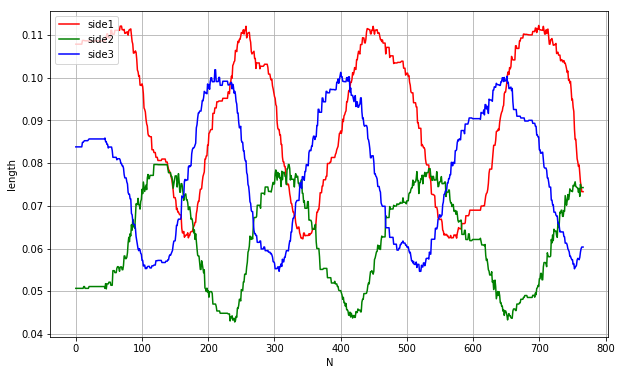

In [32]:
show_results('2marker/touchpoints-5.txt')

среднее отклонение сторона 1: 0.014650967937832578
среднее отклонение сторона 2: 0.011579701824581347
среднее отклонение сторона 3: 0.013877472401961
mean side1: 0.07664398259787188
mean side2: 0.06266354387763678
mean side3: 0.08915585792823547
max-min 1: 0.05184805848375394
max-min 2: 0.04358396262167868
dmax-min 3: 0.05035562330367078


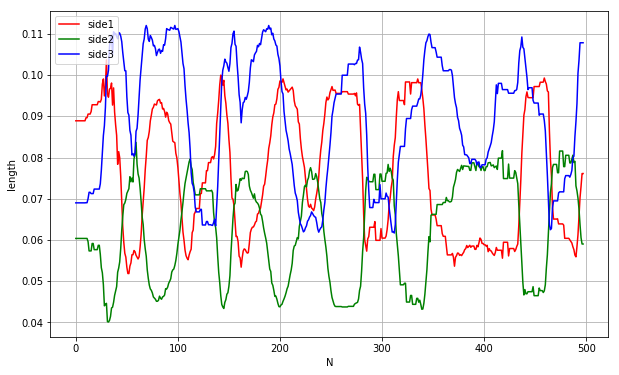

In [33]:
show_results('2marker/touchpoints-6.txt')